In [27]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from pandas import option_context


In [28]:
# Load the data
data_file = "FD_SALAAN_2021.csv"
documentation_file = "Varmod_SALAAN_2021.csv"


In [29]:
# Question 2: Load the data through pandas
df = pd.read_csv(data_file, delimiter=';', on_bad_lines='skip')
documentation_df = pd.read_csv(documentation_file, delimiter=';', on_bad_lines='skip')

# Display the first few rows of the data and documentation
print("Data sample:")
df.head()

print("Documentation sample:")
documentation_df.head()

/var/folders/kp/ksnwmywj77sb5842vcdfqwg40000gn/T/ipykernel_46056/446272214.py:2: DtypeWarning: Columns (0,1,3,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file, delimiter=';', on_bad_lines='skip')


Data sample:
Documentation sample:


,COD_VAR,LIB_VAR,COD_MOD,LIB_MOD,TYPE_VAR,LONG_VAR
0,A6,Nomenclature agrégée A6,NaN,Non renseigné,CHAR,2
1,A6,Nomenclature agrégée A6,AZ,"Agriculture, sylviculture et pêche",CHAR,2
2,A6,Nomenclature agrégée A6,BE,"Industrie manufacturière, industries extractiv...",CHAR,2
3,A6,Nomenclature agrégée A6,FZ,Construction,CHAR,2
4,A6,Nomenclature agrégée A6,GI,"Commerce de gros et de détail, transports, héb...",CHAR,2


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2403775 entries, 0 to 2403774
Data columns (total 31 columns):
 #   Column      Dtype  
---  ------      -----  
 0   A6          object 
 1   A17         object 
 2   A38         object 
 3   CPFD        object 
 4   DATDEB      float64
 5   DATFIN      float64
 6   DEPR        object 
 7   DEPT        object 
 8   DOMEMPL     float64
 9   DOMEMPL_EM  float64
 10  DUREE       float64
 11  FILT        int64  
 12  REGR        float64
 13  REGT        float64
 14  SEXE        int64  
 15  PCS         object 
 16  TYP_EMPLOI  object 
 17  CONV_COLL   float64
 18  NBHEUR      float64
 19  NBHEUR_TOT  int64  
 20  AGE         float64
 21  TRNNETO     int64  
 22  TRALCHT     int64  
 23  TREFF       float64
 24  CONT_TRAV   object 
 25  CS          float64
 26  AGE_TR      float64
 27  DATDEB_TR   float64
 28  DATFIN_TR   float64
 29  DUREE_TR    float64
 30  POND        int64  
dtypes: float64(16), int64(6), object(9)
memory usage: 568.5+ 

In [31]:
# Question 3: Clean the data, replace codes with values using the documentation
available_columns = df.columns.tolist()
print("Available columns in the dataframe:")
print(available_columns)

relevant_columns = ['SEXE','DEPR', 'AGE_TR', 'CS', 'A17', 'CPFD', 'CONT_TRAV', 'NBHEUR_TOT', 'TRNNETO']

# Extract relevant columns from the dataframe
df_relevant = df[relevant_columns]

# Replace codes with values using the documentation
for column in relevant_columns:
    if column in documentation_df['COD_VAR'].values:
        mapping = dict(zip(documentation_df[documentation_df['COD_VAR'] == column]['COD_MOD'], 
                           documentation_df[documentation_df['COD_VAR'] == column]['LIB_MOD']))
        
        # Special handling for gender (SEXE)
        if column == 'SEXE':
            mapping = {1: 'Homme', 2: 'Femme'}
        
        # Special handling for age (AGE_TR)
        elif column == 'AGE_TR':
            age_mapping = {
                0: 0, 19: 15, 23: 19, 27: 23, 31: 27, 35: 31, 39: 35, 43: 39, 
                47: 43, 51: 47, 55: 51, 59: 55, 63: 59, 67: 63, 71: 67, 72: 71
            }
            df_relevant[column] = df_relevant[column].map(age_mapping)
        # Special handling for CS (Catégorie socio-professionnelle)
        elif column == 'CS':
            cs_mapping = dict(zip(documentation_df[documentation_df['COD_VAR'] == column]['COD_MOD'], 
                                  documentation_df[documentation_df['COD_VAR'] == column]['LIB_MOD']))
            df_relevant[column] = df_relevant[column].apply(lambda x: cs_mapping.get(str(int(float(x))), x) if pd.notnull(x) else x)
        else:
            df_relevant[column] = df_relevant[column].map(mapping).fillna(df_relevant[column])

# Convert 'TRNNETO' (net salary) to numeric and apply lower bracket
if 'TRNNETO' in relevant_columns:
    salary_mapping = {
        0: 0, 1: 200, 2: 500, 3: 1000, 4: 1500,
        5: 2000, 6: 3000, 7: 4000, 8: 6000, 9: 8000,
        10: 10000, 11: 12000, 12: 14000, 13: 16000, 14: 18000,
        15: 20000, 16: 22000, 17: 24000, 18: 26000, 19: 28000,
        20: 30000, 21: 35000, 22: 40000, 23: 50000
    }
    df_relevant['TRNNETO'] = df_relevant['TRNNETO'].map(salary_mapping)

# Create column name mapping from the documentation
column_name_mapping = dict(zip(documentation_df['COD_VAR'], documentation_df['LIB_VAR']))

df_relevant = df_relevant.rename(columns=column_name_mapping)

print("Cleaned and preprocessed data sample:")
df_relevant.head()


Available columns in the dataframe:
['A6', 'A17', 'A38', 'CPFD', 'DATDEB', 'DATFIN', 'DEPR', 'DEPT', 'DOMEMPL', 'DOMEMPL_EM', 'DUREE', 'FILT', 'REGR', 'REGT', 'SEXE', 'PCS', 'TYP_EMPLOI', 'CONV_COLL', 'NBHEUR', 'NBHEUR_TOT', 'AGE', 'TRNNETO', 'TRALCHT', 'TREFF', 'CONT_TRAV', 'CS', 'AGE_TR', 'DATDEB_TR', 'DATFIN_TR', 'DUREE_TR', 'POND']


/var/folders/kp/ksnwmywj77sb5842vcdfqwg40000gn/T/ipykernel_46056/145581658.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant[column] = df_relevant[column].map(mapping).fillna(df_relevant[column])
/var/folders/kp/ksnwmywj77sb5842vcdfqwg40000gn/T/ipykernel_46056/145581658.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant[column] = df_relevant[column].map(age_mapping)
/var/folders/kp/ksnwmywj77sb5842vcdfqwg40000gn/T/ipykernel_46056/145581658.py:32: SettingWithCopyWarning: 
A value

Cleaned and preprocessed data sample:


/var/folders/kp/ksnwmywj77sb5842vcdfqwg40000gn/T/ipykernel_46056/145581658.py:34: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_relevant[column] = df_relevant[column].map(mapping).fillna(df_relevant[column])
/var/folders/kp/ksnwmywj77sb5842vcdfqwg40000gn/T/ipykernel_46056/145581658.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant[column] = df_relevant[column].map(mapping).fillna(df_relevant[column])
/var/folders/kp/ksnwmywj77sb5842vcdfqwg40000gn/T/ipykernel_46056/145581658.py:45: SettingWithCopyWarning: 
A value

,Genre,Département de résidence,Tranche d'age quadriennale,Catégorie socio-professionnelle (code sur 2 positions),Nomenclature agrégée A17,Condition d'emploi,Contrat de travail,Nombre d'heures salariées total,Tranche salaire net total
0,1,Maine-et-Loire,43.0,Ouvriers non qualifiés de type industriel,Fabrication d'autres produits industriels,Temps complet,Contrat à durée indéterminée,1821.0,20000
1,1,Mayenne,43.0,Ouvriers non qualifiés de type industriel,Fabrication d'autres produits industriels,Temps complet,Contrat à durée indéterminée,1731.0,14000
2,1,Nord,43.0,Ingénieurs et cadres techniques d'entreprises,Fabrication d'autres produits industriels,Temps complet,Contrat à durée indéterminée,1825.0,30000
3,1,Pas-de-Calais,43.0,Ouvriers non qualifiés de type industriel,Fabrication d'autres produits industriels,Temps complet,Contrat à durée déterminée,364.0,3000
4,1,Pyrénées-Orientales,43.0,Ouvriers qualifiés de type industriel,Fabrication d'autres produits industriels,Temps complet,Contrat à durée indéterminée,1764.0,20000


In [32]:
df_relevant.isnull().sum()

Genre                                                     0
Département de résidence                                  0
Tranche d'age quadriennale                                2
Catégorie socio-professionnelle (code sur 2 positions)    5
Nomenclature agrégée A17                                  0
Condition d'emploi                                        0
Contrat de travail                                        0
Nombre d'heures salariées total                           0
Tranche salaire net total                                 0
dtype: int64

In [33]:
df_clean = df_relevant.dropna()


In [34]:
# Question 4: Data analysis

# Compute correlation matrix for numerical variables
numerical_vars = df_clean.select_dtypes(include=['int64', 'float64', 'float32'])

if 'Tranche d\'age quadriennale' in df_clean.columns:
    numerical_vars['Tranche d\'age quadriennale'] = df_clean['Tranche d\'age quadriennale']

# Remove 'Genre' from numerical variables if present
if 'Genre' in numerical_vars.columns:
    numerical_vars = numerical_vars.drop('Genre', axis=1)

correlation_matrix = numerical_vars.corr()

print("Correlation matrix for numerical variables:")
print(correlation_matrix)

# Display the correlation matrix as a styled table
styled_corr = correlation_matrix.style.background_gradient(cmap='coolwarm', axis=None).format("{:.2f}")
display(styled_corr)

# Identify highly correlated variables
high_correlation = correlation_matrix[abs(correlation_matrix) > 0.6].stack()
high_correlation = high_correlation[high_correlation < 1].sort_values(ascending=False)
print("\nHighly correlated variables (correlation > 0.6):")
print(high_correlation)


Correlation matrix for numerical variables:
                                 Tranche d'age quadriennale  \
Tranche d'age quadriennale                         1.000000   
Nombre d'heures salariées total                    0.201573   
Tranche salaire net total                          0.316368   

                                 Nombre d'heures salariées total  \
Tranche d'age quadriennale                              0.201573   
Nombre d'heures salariées total                         1.000000   
Tranche salaire net total                               0.693312   

                                 Tranche salaire net total  
Tranche d'age quadriennale                        0.316368  
Nombre d'heures salariées total                   0.693312  
Tranche salaire net total                         1.000000  


,Tranche d'age quadriennale,Nombre d'heures salariées total,Tranche salaire net total
Tranche d'age quadriennale,1.00,0.20,0.32
Nombre d'heures salariées total,0.20,1.00,0.69
Tranche salaire net total,0.32,0.69,1.00



Highly correlated variables (correlation > 0.6):
Nombre d'heures salariées total  Tranche salaire net total          0.693312
Tranche salaire net total        Nombre d'heures salariées total    0.693312
dtype: float64


# Analysis of the Correlation Matrix
 
Based on the correlation matrix provided, we can make the following observations:
 
 1. Strong positive correlation:
    - The strongest correlation (0.693) is between 'Nombre d'heures salariées total' (Total hours worked) and 'Tranche salaire net total' (Net salary range). This indicates that people who work more hours generally earn more money, which is a logical relationship in most employment contexts.
 
 2. Moderate positive correlations:
    - There's a moderate positive correlation (0.316) between 'Tranche d'age quadriennale' (Age group) and 'Tranche salaire net total'. This suggests that older employees tend to earn more, which is often the case due to accumulated experience and career progression.
    - 'Tranche d'age quadriennale' also shows a weak to moderate positive correlation (0.202) with 'Nombre d'heures salariées total', indicating that older employees might work slightly more hours on average.
 
 3. Perfect correlations:
    - Each variable has a perfect correlation (1.000) with itself, as expected in a correlation matrix.
 
 4. Symmetry:
    - The correlation matrix is symmetrical, with the same values appearing on both sides of the diagonal. This is a standard property of correlation matrices.

 In conclusion, the correlations observed in the matrix align with common socio-economic patterns. The strong correlation between working hours and salary is expected in most labor markets. The moderate correlation between age and salary reflects typical career progression. The weak to moderate correlation between age and working hours might suggest that more experienced employees tend to work slightly longer hours, possibly due to increased responsibilities. These relationships provide valuable insights into the dynamics of the workforce represented in this dataset.


In [35]:
# Look at average salary grouped by categorical variables
categorical_vars = df_clean.select_dtypes(include=['object'])

# Add 'Genre' (gender) to categorical variables if it's not already included
if 'Genre' not in categorical_vars.columns:
    categorical_vars['Genre'] = df_clean['Genre']

for column in categorical_vars.columns:
    avg_salary_by_category = df_clean.groupby(column)['Tranche salaire net total'].mean().sort_values(ascending=False)
    print(f"\nAverage salary by {column}:")
    print(avg_salary_by_category)
    
    # Calculate the difference between highest and lowest average salary
    salary_range = avg_salary_by_category.max() - avg_salary_by_category.min()
    print(f"\nRange of average salaries for {column}: {salary_range:.2f}")

# Specific analysis for gender
if 'Genre' in categorical_vars.columns:
    avg_salary_by_gender = df_clean.groupby('Genre')['Tranche salaire net total'].mean().sort_values(ascending=False)
    print("\nAverage salary by Gender:")
    print(avg_salary_by_gender)
    
    gender_salary_range = avg_salary_by_gender.max() - avg_salary_by_gender.min()
    print(f"\nRange of average salaries for Gender: {gender_salary_range:.2f}")



Average salary by Département de résidence:
Département de résidence
Hauts-de-Seine         26073.710174
Yvelines               24533.649639
Paris                  24471.203531
Val-de-Marne           22057.106305
Essonne                21971.752442
                           ...     
Lozère                 16998.482878
Aude                   16922.014427
Pyrénées-Orientales    16690.275656
Non renseigné          16684.637796
Hautes-Alpes           16616.416684
Name: Tranche salaire net total, Length: 101, dtype: float64

Range of average salaries for Département de résidence: 9457.29

Average salary by Catégorie socio-professionnelle (code sur 2 positions):
Catégorie socio-professionnelle (code sur 2 positions)
Cadres administratifs et commerciaux d'entreprises                            35930.752215
Ingénieurs et cadres techniques d'entreprises                                 35488.324497
Cadres de la fonction publique                                                31108.520450
Profe

# Analysis of Salary by Categorical Variables

Based on the provided data, we can observe several interesting patterns in the average salaries across different categorical variables:

1. Département de résidence:
   - The range of average salaries is 9,457.29, indicating significant regional differences.
   - Hauts-de-Seine, Yvelines, and Paris have the highest average salaries, which is logical given these are affluent areas around the capital.
   - Rural departments like Lozère, Aude, and Pyrénées-Orientales have lower average salaries, reflecting the typical urban-rural wage gap.

2. Catégorie socio-professionnelle:
   - This variable shows the largest range in average salaries (28,650.56), suggesting it has a significant effect on salary.
   - The hierarchy of salaries aligns with typical expectations: executives and engineers at the top, followed by middle management and skilled workers, with unskilled workers and service personnel at the lower end.
   - This distribution appears logical, reflecting the usual correlation between skill level, responsibility, and compensation.

3. Nomenclature agrégée A17 (Industry sectors):
   - The range of 32,597.43 indicates substantial differences across sectors.
   - High-paying sectors like Cokefaction and refining, Financial activities, and Transport equipment manufacturing are at the top, which is consistent with global trends.
   - Lower-paying sectors include Accommodation and food services, which typically have lower barriers to entry and often employ part-time or seasonal workers.

4. Condition d'emploi (Employment condition):
   - Full-time workers earn significantly more than part-time workers, which is expected.

5. Contrat de travail (Contract type):
   - Permanent contracts (CDI) have higher average salaries than fixed-term (CDD) or temporary contracts, which is logical given job security and experience.
   - Apprenticeship contracts have lower salaries, which is expected for entry-level, training positions.

6. Genre (Gender):
   - There's a noticeable gender pay gap, with men (code 1) earning on average 3,155.59 more than women (code 2).
   - This gap, while concerning, is unfortunately consistent with observed trends in many countries and industries.

In conclusion, the Catégorie socio-professionnelle and Nomenclature agrégée A17 variables seem to have the largest effect on salary, which is logical as they directly relate to job type and industry sector. The observed patterns generally align with expected socio-economic trends, though they also highlight areas of potential inequality, particularly regarding gender and regional differences.


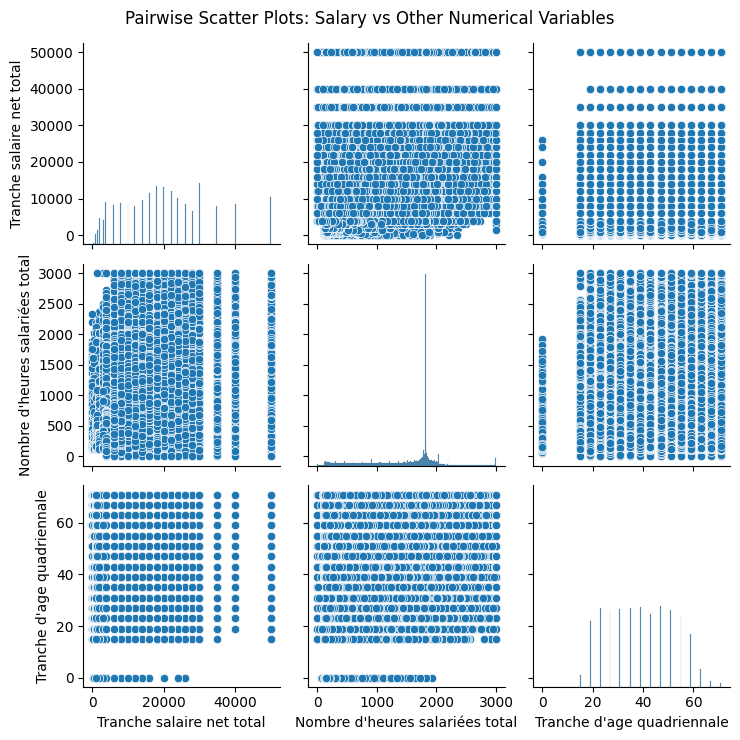

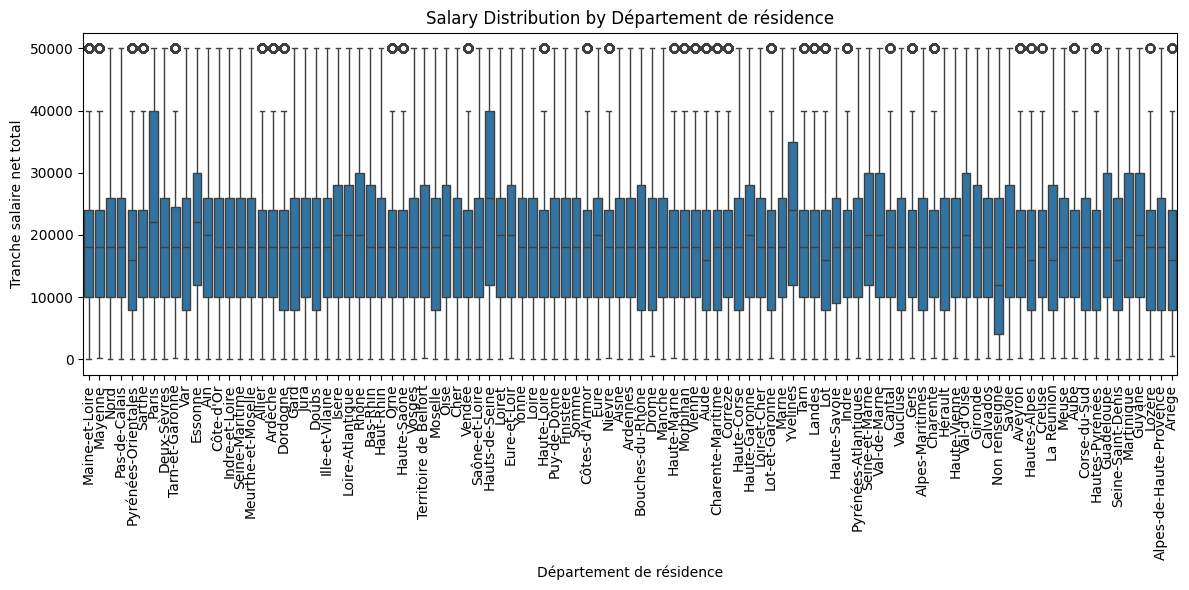

/var/folders/kp/ksnwmywj77sb5842vcdfqwg40000gn/T/ipykernel_46056/4150835331.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


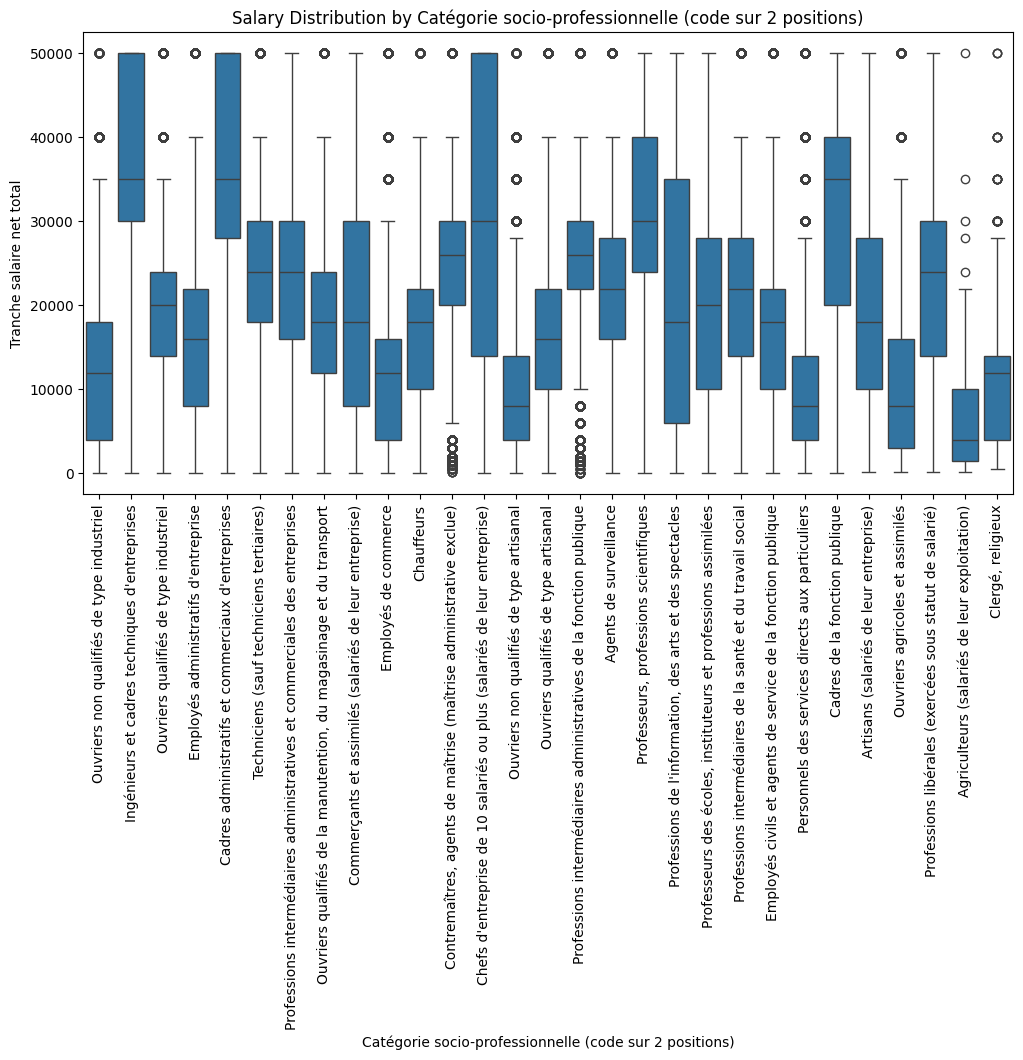

/var/folders/kp/ksnwmywj77sb5842vcdfqwg40000gn/T/ipykernel_46056/4150835331.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


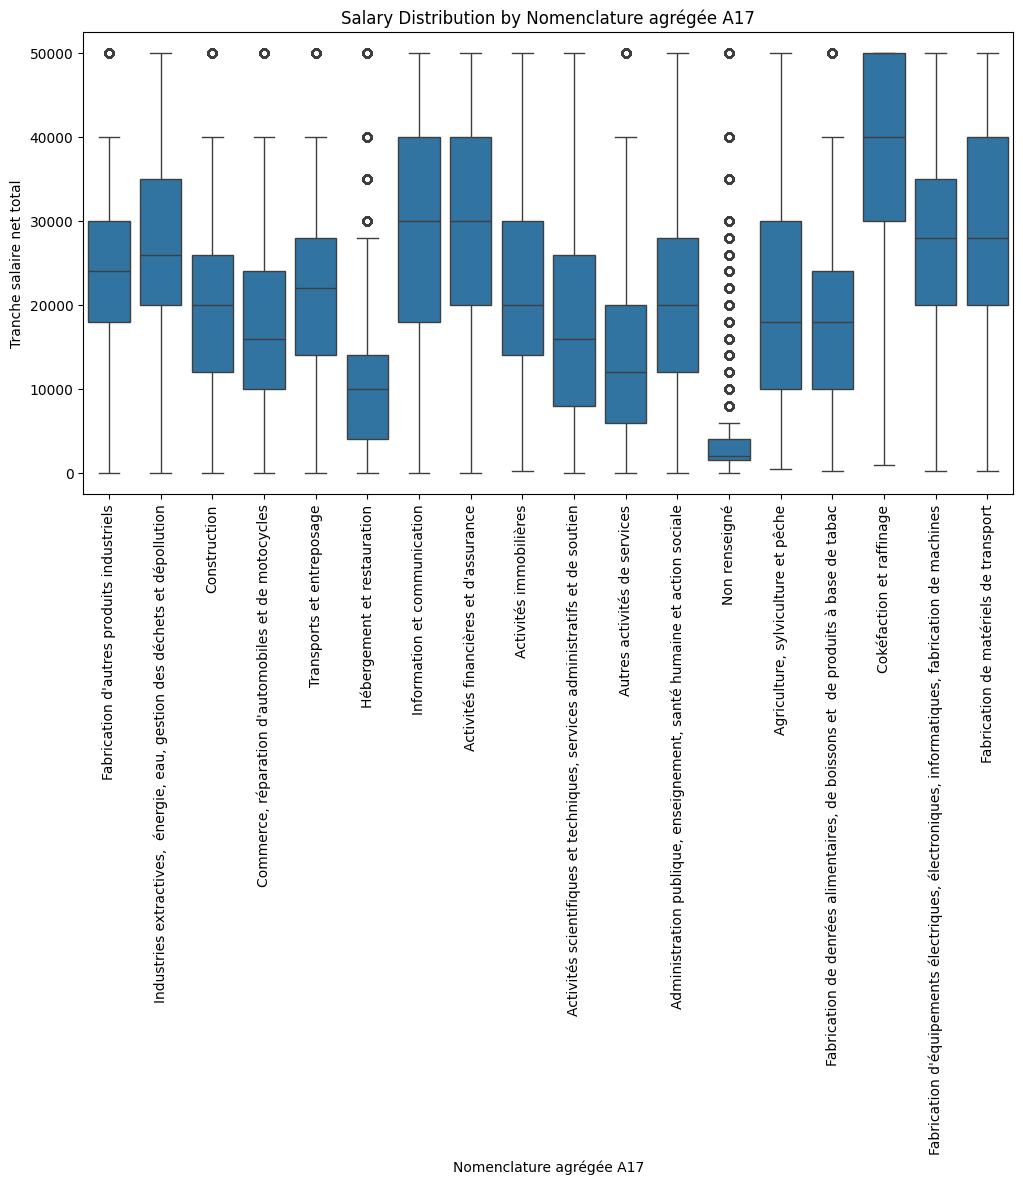

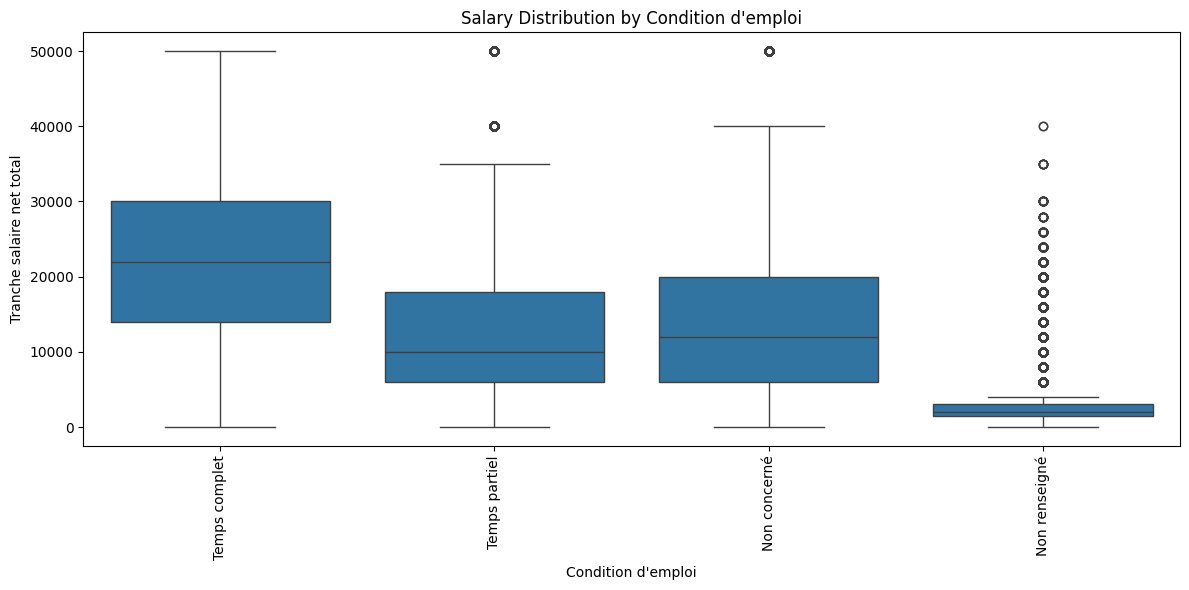

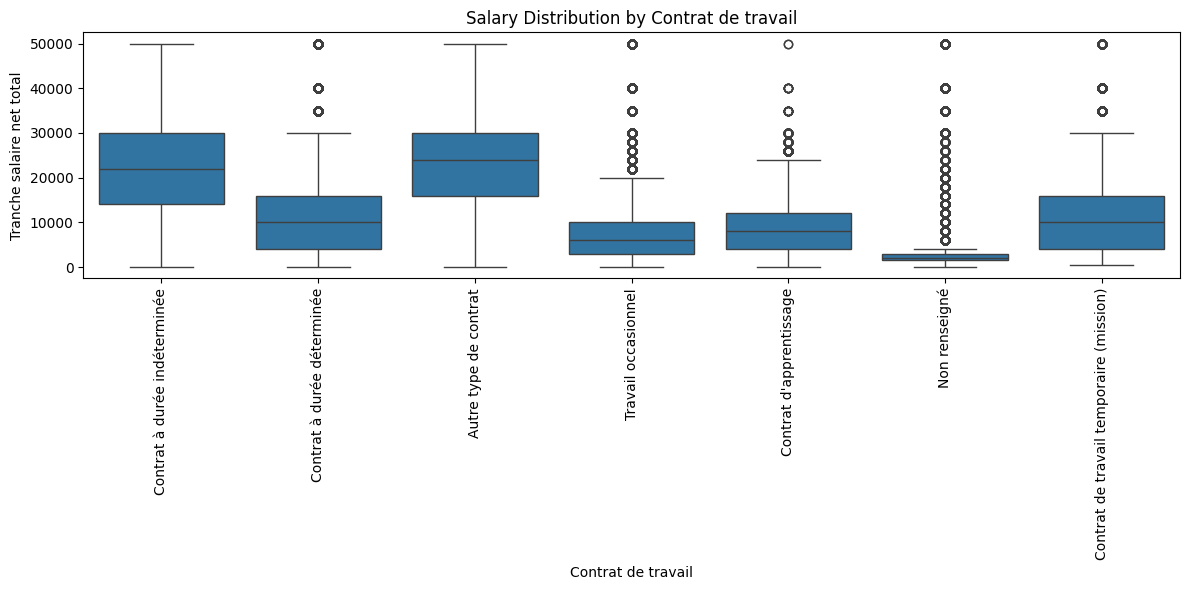

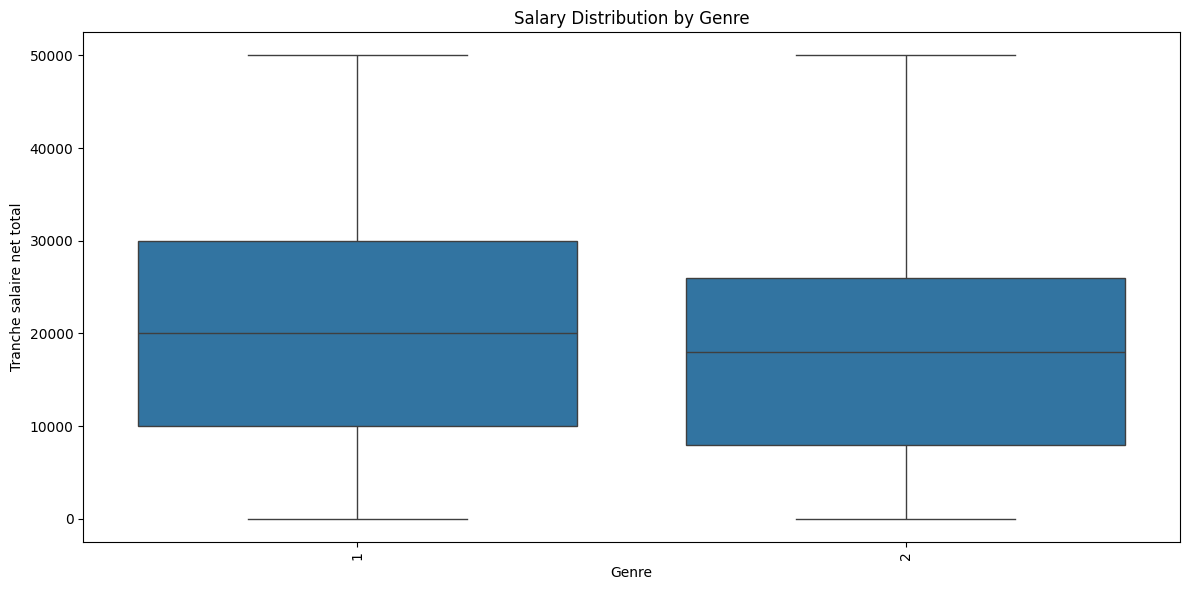

In [36]:
# Question 5: Visualization
# Pairwise scatter plots between salary and other numerical variables
sns.pairplot(numerical_vars, vars=['Tranche salaire net total', 'Nombre d\'heures salariées total', 'Tranche d\'age quadriennale'])
plt.suptitle('Pairwise Scatter Plots: Salary vs Other Numerical Variables')
plt.tight_layout()
plt.show()

# Box-plots of salary for each categorical variable
for column in categorical_vars.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=column, y='Tranche salaire net total', data=df_relevant)
    plt.title(f'Salary Distribution by {column}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


In [39]:
# Question 6: Linear model
# Preparing data for the model
# Remove rows with missing values

X = df_clean.drop(columns=['Tranche salaire net total'])
y = df_clean['Tranche salaire net total']

# Clean y for wrong values 
mask =(np.isfinite(y)) & (y < 51000)
X = X[mask]
y = y[mask]

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


# Create and fit the model
model = LinearRegression()
print("Training linear model...")
model.fit(X_train, y_train)
print("Linear model training complete.")

# Predict and evaluate the model
print("Evaluating linear model...")
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R2 score:", r2)
print("RMSE:", rmse)

# Check the coefficients
coefficients = pd.DataFrame({
    "Feature": X_encoded.columns,
    "Coefficient": model.coef_
})
print("Top 10 Coefficients:")
pd.set_option('display.max_colwidth', None)
display(coefficients.sort_values("Coefficient", key=abs, ascending=False))
pd.reset_option('display.max_colwidth')





Training linear model...
Linear model training complete.
Evaluating linear model...
R2 score: 0.7434241588387853
RMSE: 6430.837401459236
Top 10 Coefficients:


,Feature,Coefficient
105,Catégorie socio-professionnelle (code sur 2 positions)_Cadres administratifs et commerciaux d'entreprises,13070.550196
115,Catégorie socio-professionnelle (code sur 2 positions)_Ingénieurs et cadres techniques d'entreprises,12032.793720
106,Catégorie socio-professionnelle (code sur 2 positions)_Cadres de la fonction publique,10255.738669
124,"Catégorie socio-professionnelle (code sur 2 positions)_Professeurs, professions scientifiques",9539.922236
155,Contrat de travail_Non renseigné,8647.146896
...,...,...
60,Département de résidence_Loiret,-54.290093
88,Département de résidence_Seine-Saint-Denis,-33.184864
30,Département de résidence_Eure,15.937808
139,Nomenclature agrégée A17_Fabrication d'autres produits industriels,11.760385


In [42]:
coefficients[coefficients['Feature'] == 'Genre']

,Feature,Coefficient
0,Genre,-1562.470882



The relative difference of the gender with all other features equivalent is 1562 between men and women.
This difference shows, when compared to the absolute differnce of salaries, which was around 3200, that women have multiple explanations for a reduced salary : 
- a difference of salary at the same position and the sema context socio-economic
- a diffenrece in jobs accessed by women, which are genrally less paid

In [41]:
coefficients[coefficients['Feature'] == 'Tranche d\'age quadriennale']

,Feature,Coefficient
1,Tranche d'age quadriennale,128.871027


In [43]:
# Question 7: Improve the model by taking the log of the salary
# Ensure all values are positive before taking log
y_positive = y[y > 0]
X_positive = X_encoded.loc[y_positive.index]

y_log = np.log(y_positive)

# Split the data again
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_positive, y_log, test_size=0.2, random_state=42)

# Create and fit the log model
model_log = LinearRegression()
print("\nTraining log-transformed model...")
model_log.fit(X_train_log, y_train_log)
print("Log-transformed model training complete.")

# Predict and evaluate the log model
print("Evaluating log-transformed model...")
y_pred_log = model_log.predict(X_test_log)
r2_log = r2_score(y_test_log, y_pred_log)
rmse_log = np.sqrt(mean_squared_error(y_test_log, y_pred_log))

print("\nR2 score (log):", r2_log)
print("RMSE (log):", rmse_log)

# Check the coefficients for log model
coefficients_log = pd.DataFrame({
    "Feature": X_positive.columns,
    "Coefficient": model_log.coef_
})
print("Top 10 Coefficients (log):")
with option_context('display.max_colwidth', None):
    display(coefficients_log.sort_values("Coefficient", key=abs, ascending=False))


Training log-transformed model...
Log-transformed model training complete.
Evaluating log-transformed model...

R2 score (log): 0.8291204049294055
RMSE (log): 0.37260360870271797
Top 10 Coefficients (log):


,Feature,Coefficient
148,Condition d'emploi_Non renseigné,-0.829446
103,Catégorie socio-professionnelle (code sur 2 positions)_Agriculteurs (salariés de leur exploitation),-0.556476
155,Contrat de travail_Non renseigné,0.484144
151,Contrat de travail_Contrat d'apprentissage,-0.466548
105,Catégorie socio-professionnelle (code sur 2 positions)_Cadres administratifs et commerciaux d'entreprises,0.425970
...,...,...
139,Nomenclature agrégée A17_Fabrication d'autres produits industriels,0.001219
46,Département de résidence_Hautes-Alpes,-0.001097
59,Département de résidence_Loire-Atlantique,-0.001060
2,Nombre d'heures salariées total,0.001023
